

## Gravity Model

Codebook: http://www.cepii.fr/DATA_DOWNLOAD/gravity/gravdata_codebook_2015.pdf <br>
Source: http://www.cepii.fr/CEPII/en/bdd_modele/presentation.asp?id=8 <br>
Resources: https://sites.google.com/site/hiegravity/stata-programs

Use this data on bilateral trade flows, bilateral tariffs, and other barriers to trade to estimate the elasticity of trade with
respect to trade costs.

Aim: Replicate some models from Eaton and Kortum (2002) <br>
https://www.princeton.edu/~erossi/courses_files/EKn.pdf

And following the steps outlined by Waugh, Michael<br>
https://github.com/mwaugh0328/Gravity-Estimation

In [1]:
cd

C:\Users\jerem\Documents\International Trade\TermPaper


In [2]:
import delimited "..\Gravity-Estimation\gravity_data.csv"

(5 vars, 900 obs)


In [3]:
des


Contains data
  obs:           900                          
 vars:             5                          
 size:         9,900                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
v1              byte    %8.0g                 
v2              byte    %8.0g                 
v3              float   %9.0g                 
v4              float   %9.0g                 
v5              byte    %8.0g             

In [4]:
rename v1 importer
rename v2 exporter
rename v3 trade_data
rename v4 distance
rename v5 border

In [5]:
* Drop the home trade share observations
drop if trade_data == 1

(30 observations deleted)


In [6]:
gen ln_trade = ln(trade_data)
gen ln_distc = ln(distance)

gen dis1 = 0
replace dis1 = 1 if distance <= 375

gen dis2 =0
replace dis2 = 1 if distance > 375 & distance <= 750

gen dis3 =0
replace dis3 = 1 if distance > 750 & distance <= 1500

gen dis4 =0
replace dis4 = 1 if distance > 1500 & distance <= 3000

gen dis5 =0
replace dis5 = 1 if distance > 3000 & distance <= 6000

gen dis6 = 0 
replace dis6 = 1 if distance > 6000


(4 missing values generated)



(34 real changes made)


(62 real changes made)


(132 real changes made)


(54 real changes made)


(320 real changes made)


(268 real changes made)


(bin=29, start=-10.761509, width=.3803246)


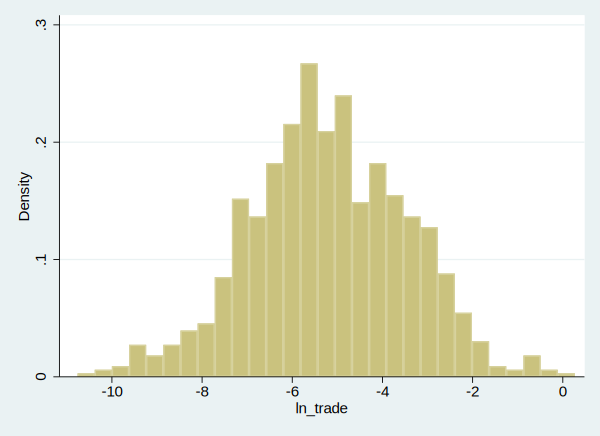

In [7]:
histogram ln_trade

(bin=29, start=4.8067479, width=.15837556)


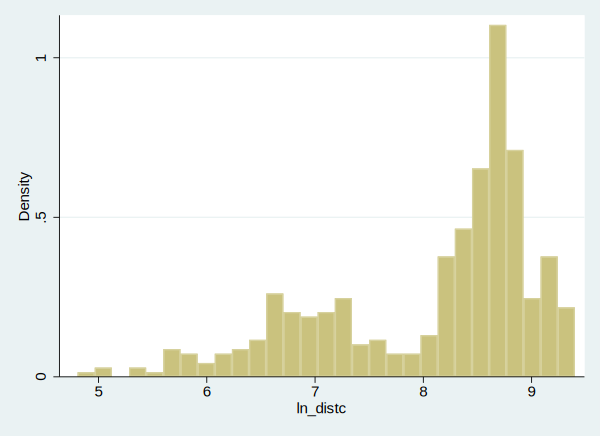

In [8]:
histogram ln_distc

In [9]:
* Drop zeros---NOT A BIG DEAL!
drop if trade_data == 0

(4 observations deleted)


In [10]:
* This allows one to arbitrarily pick the base for the dummy variables. If base = 1, then all the exporter
* effects are interpreted relative to county 1, etc. This does not matter for constructing trade costs or trade
* flows, etc. It can matter for the counterfactual.

fvset base 1 importer
fvset base 1 exporter

In [11]:
regress ln_trade i.exporter i.importer dis1 dis2 dis3 dis4 dis5 dis6 border, noconstant robust


Linear regression                               Number of obs     =        866
                                                F(65, 801)        =    1528.22
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9881
                                                Root MSE          =     .62316

------------------------------------------------------------------------------
             |               Robust
    ln_trade |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    exporter |
          2  |   .5996934    .258927     2.32   0.021     .0914379    1.107949
          3  |   .3562245   .1865337     1.91   0.057    -.0099281    .7223772
          4  |   2.032789   .1952611    10.41   0.000     1.649505    2.416072
          5  |   1.460286   .2013076     7.25   0.000     1.065133    1.855438